In [25]:
from random import randint
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import matplotlib

In [2]:
def gen_data(n,m,filename):
    a = [randint(1,2*n) for i in range(n)]
    q1 = [randint(1,n) for i in range(m)]
    q2 = [randint(1,n) for i in range(m)]
    q = [(min(q1[i],q2[i]),max(q1[i],q2[i])) for i in range(m)]
    with open(filename,'w') as f:
        f.write("{} {}\n".format(n,m))
        for i in a:
            f.write("{}\n".format(i))
        for i in q:
            f.write("{} {}\n".format(i[0],i[1]))


In [3]:
gen_data(10,100,'test.in')

In [4]:
start_t = time.time_ns()
os.system("sleep 1")
end_t = time.time_ns()
print(end_t-start_t)

1007163702


In [10]:
def test_algo(n,m,srcfile):
    os.system("rm -f test.in test.out a.out")
    gen_data(n,m,'test.in')
    cmd0 = "g++ {}".format(srcfile)
    cmd1 = "./a.out < test.in > test.out"
    os.system(cmd0)
    start_t = time.time_ns()
    os.system(cmd1)
    end_t = time.time_ns()
    # print(end_t-start_t)
    os.system("rm -f test.in test.out a.out")
    return (end_t-start_t)

In [6]:
test_algo(100000,10000,"Seg_tree.cpp")

20264898


In [7]:
test_algo(100000,10000,"Prefix_array.cpp")

12522355


In [8]:
test_algo(100000,10000,"Plain_array.cpp")

452008311


In [9]:
src_list = glob("*.cpp")
src_list

['Block_array.cpp',
 'Plain_array.cpp',
 'BIT_array.cpp',
 'Seg_tree.cpp',
 'Prefix_array.cpp']

In [28]:
N = [round(10000*1.3**i) for i in range(15)]
N

[10000,
 13000,
 16900,
 21970,
 28561,
 37129,
 48268,
 62749,
 81573,
 106045,
 137858,
 179216,
 232981,
 302875,
 393738]

In [29]:
M = 10000
res = {i:[] for i in src_list}
for s in src_list:
    for n in N:
        tmp = test_algo(n,n,s)
        print(s,n,tmp)
        res[s].append((n,tmp))

Block_array.cpp 10000 7736175
Block_array.cpp 13000 9469125
Block_array.cpp 16900 12479030
Block_array.cpp 21970 16424176
Block_array.cpp 28561 21136728
Block_array.cpp 37129 29614697
Block_array.cpp 48268 40512640
Block_array.cpp 62749 55910719
Block_array.cpp 81573 82602288
Block_array.cpp 106045 118532039
Block_array.cpp 137858 169118978
Block_array.cpp 179216 243348368
Block_array.cpp 232981 351592795
Block_array.cpp 302875 506749331
Block_array.cpp 393738 741030017
Plain_array.cpp 10000 60166868
Plain_array.cpp 13000 91250674
Plain_array.cpp 16900 142138417
Plain_array.cpp 21970 233380159
Plain_array.cpp 28561 376515495
Plain_array.cpp 37129 622048224
Plain_array.cpp 48268 1034680117
Plain_array.cpp 62749 1749113459
Plain_array.cpp 81573 2925230877
Plain_array.cpp 106045 4957027886
Plain_array.cpp 137858 8315950476
Plain_array.cpp 179216 14082326426
Plain_array.cpp 232981 23739492433
Plain_array.cpp 302875 39976343451
Plain_array.cpp 393738 67559650678
BIT_array.cpp 10000 17579202

In [20]:
res

{'Block_array.cpp': [(10000, 8065451),
  (13000, 8160182),
  (16900, 9004420),
  (21970, 9645951),
  (28561, 10509700),
  (37129, 11597389),
  (48268, 13098811),
  (62749, 14396645),
  (81573, 16522921),
  (106045, 19129841),
  (137858, 23416131),
  (179216, 26162104),
  (232981, 30897736),
  (302875, 37275022),
  (393738, 44040510),
  (511859, 54135838),
  (665417, 67249552),
  (865042, 84381523),
  (1124554, 104036717),
  (1461920, 129041999),
  (1900496, 159795742),
  (2470645, 198488696),
  (3211839, 248198155),
  (4175391, 314619771),
  (5428008, 400801664)],
 'Plain_array.cpp': [(10000, 61165329),
  (13000, 74056149),
  (16900, 92907150),
  (21970, 115218285),
  (28561, 141726053),
  (37129, 181584336),
  (48268, 230760711),
  (62749, 293176906),
  (81573, 376283194),
  (106045, 480688003),
  (137858, 616458329),
  (179216, 800537133),
  (232981, 1049581534),
  (302875, 1357940756),
  (393738, 1768518125),
  (511859, 2278659298),
  (665417, 2948286218),
  (865042, 3819970350),
  

In [21]:
plt.style.use('default')

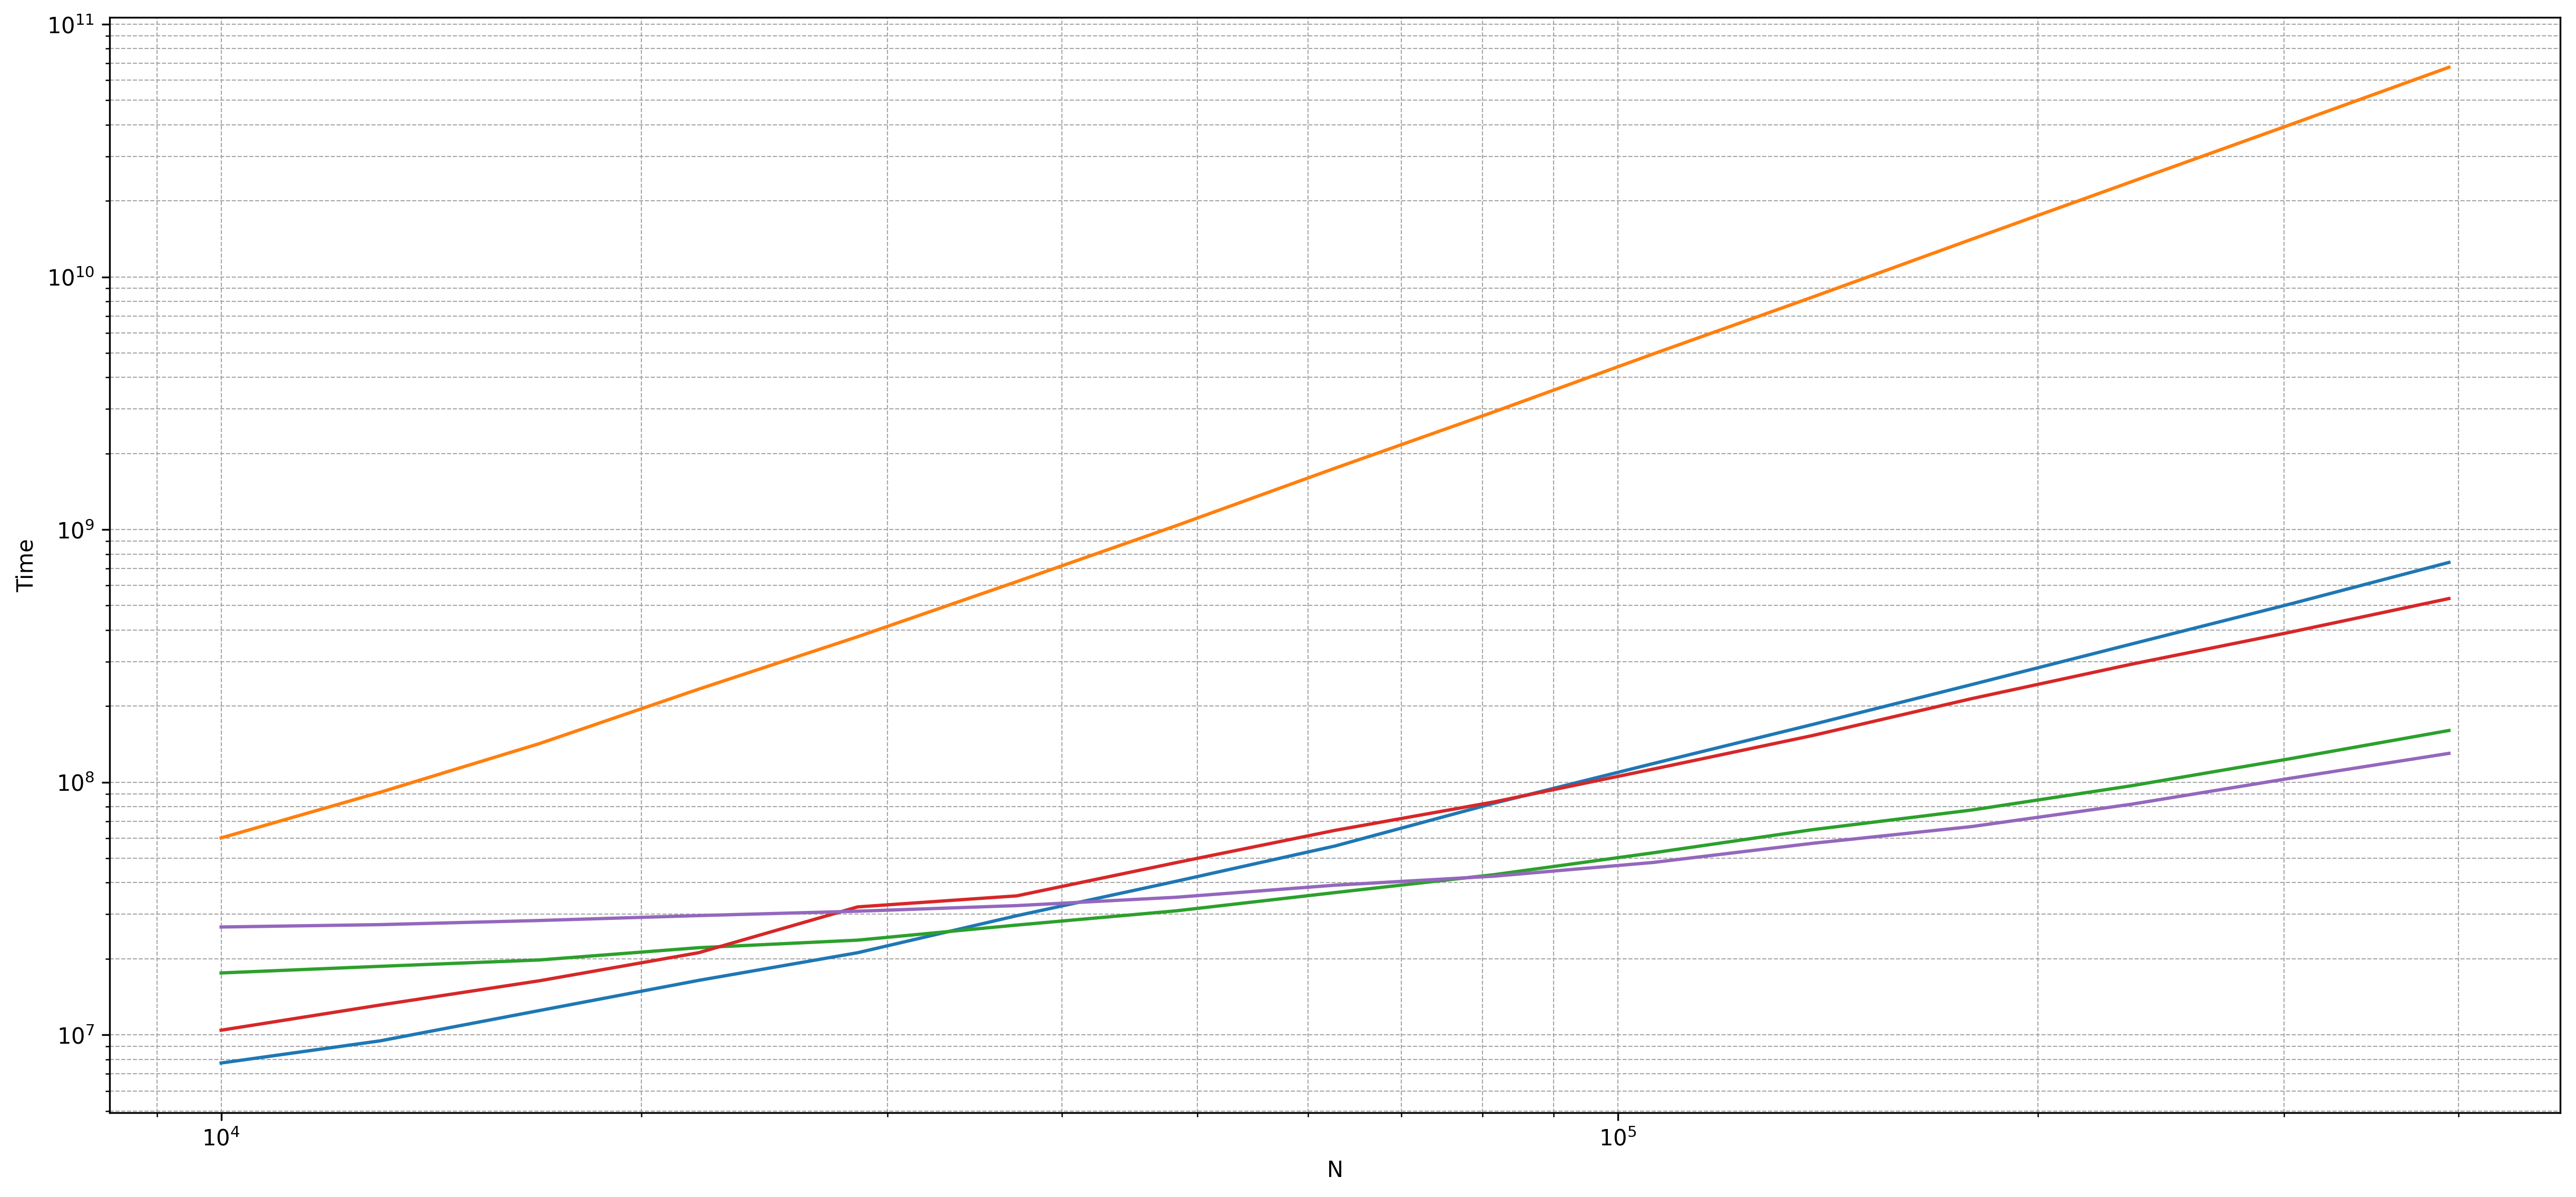

In [33]:
dpi = 300
fig = plt.figure(figsize=(20, 9), dpi=dpi)
plt.grid(True, lw = 0.5, ls = '--', c = '.65',which='both')
plt.xlabel('N')
plt.ylabel('Time')
for i in res.items():
    tx = [j[0] for j in i[1]]
    ty = [j[1] for j in i[1]]
    plt.loglog(tx,ty,label=i[0])
# plt.legend()
fig.show()

/tmp/ipykernel_46210/2829562163.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


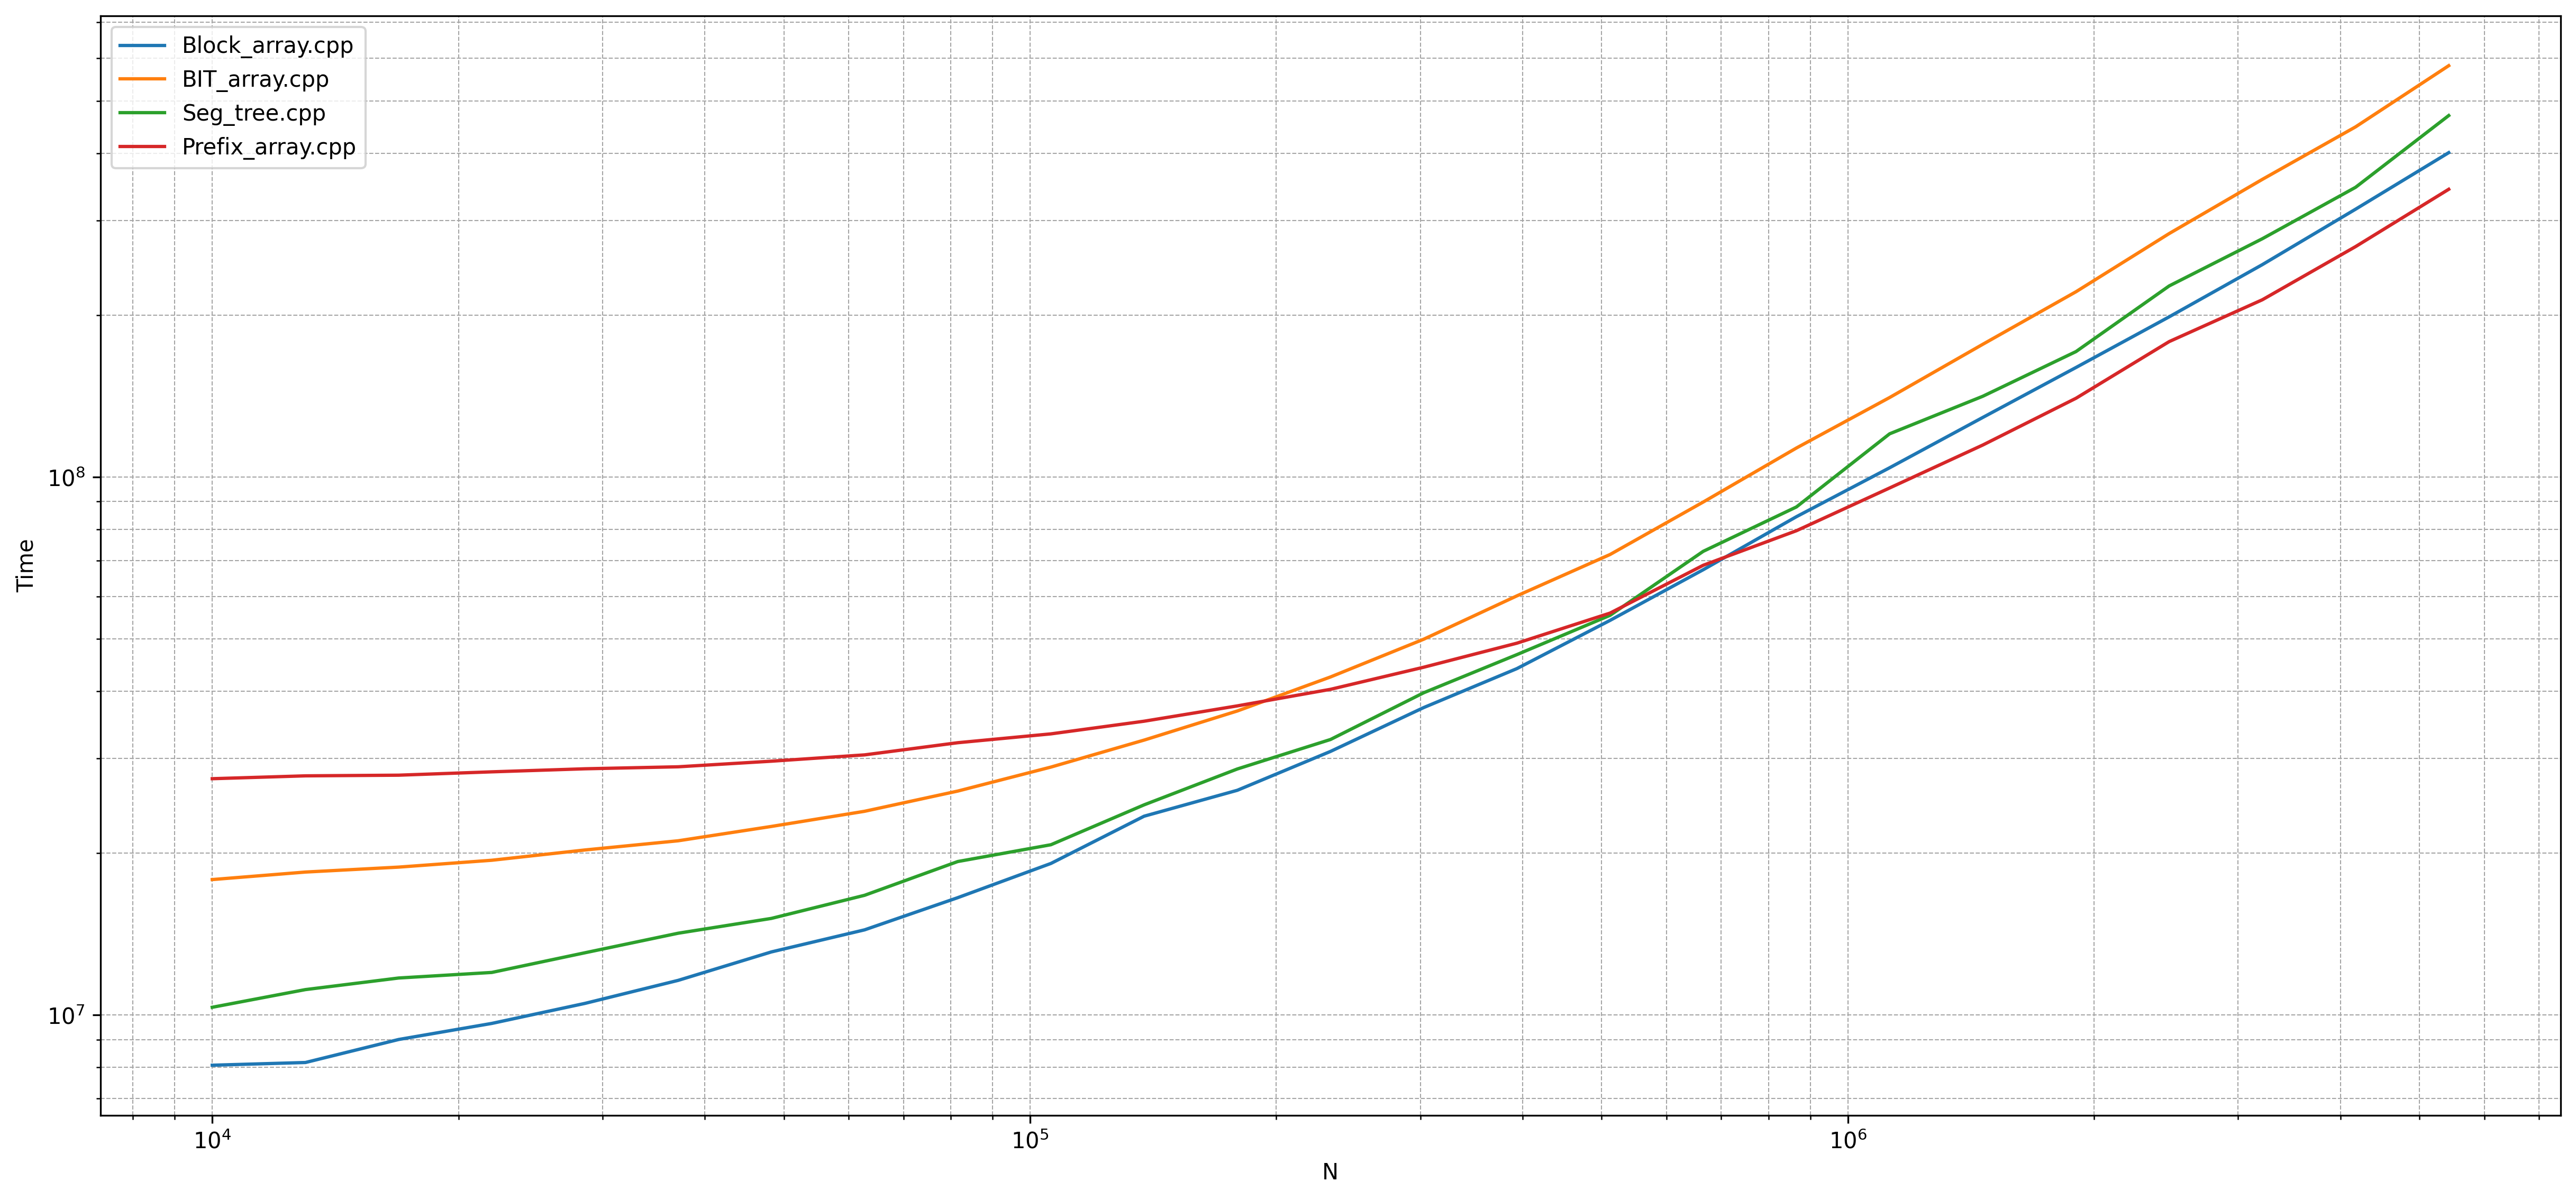

In [23]:
dpi = 300
fig = plt.figure(figsize=(20, 9), dpi=dpi)
plt.grid(True, lw = 0.5, ls = '--', c = '.65',which='both')
plt.xlabel('N')
plt.ylabel('Time')
for i in res.items():
    if (i[0] == 'Plain_array.cpp'):
        continue
    tx = [j[0] for j in i[1]]
    ty = [j[1] for j in i[1]]
    plt.loglog(tx,ty,label=i[0])
plt.legend()
fig.show()

In [31]:
dpi = 300
matplotlib.use('Agg')
fig = plt.figure(figsize=(20, 9), dpi=dpi)
plt.grid(True, lw = 0.5, ls = '--', c = '.65',which='both')
plt.xlabel('N')
plt.ylabel('Time')
for i in res.items():
    tx = [j[0] for j in i[1]]
    ty = [j[1] for j in i[1]]
    plt.loglog(tx,ty,label=i[0])
plt.legend()
plt.savefig('performance2.eps',format='eps')
matplotlib.use('TkAgg')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
